In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

import math
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23

datas_full = ['mini_test', 'tiered_test', "places", "plantae", "cars", "cub", 'crop','euro', 'isic', 'chest']
datas_fullname = ['miniIN','tieredIN','Places','Plantae', 'Cars', 'CUB', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX']
cdfsl = ['mini_test','crop', 'euro', 'isic', 'chest']
noncdfsl = ['tiered_test', "places", "plantae", "cars", "cub"]
color_cdfsl =['#93c47d', '#c27ba0','#54b2a9', '#8e7cc3', '#6fa8dc',]


import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)/opt/conda/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


['Times New Roman']
23.0
/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [3]:
result = pd.DataFrame(None, index=cdfsl, columns=['_weaker', '_weak', '_strong', '_stronger'])

path_no_aug = "mini_head.csv"
test_acc_no = pd.read_csv(path_no_aug, index_col = 'Unnamed: 0')

for data in result.index:
    acc_no = test_acc_no.loc[data,'20shot']
    #acc_no = float(acc_no[:5])
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_head_default/augmentation/base{}/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result.loc[data][types] = acc - acc_no
result.columns = ["weaker", "weak", "strong", "stronger"]
#plt.figure(figsize=(6,8))

result.to_csv('intensity_diff_20shot.csv')
result

,weaker,weak,strong,stronger
mini_test,0.224445,0.128889,-0.288889,-1.326667
crop,-0.002222,-1.28,-2.688889,-4.051111
euro,0.097778,-0.255555,-1.102222,-2.268889
isic,0.273333,0.095556,-0.953333,-3.215555
chest,0.251111,-0.206667,-0.86,-1.706667


In [29]:
result = pd.DataFrame(None, index=cdfsl, columns=['01shot', '05shot', '20shot'])
for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        result.loc[data][types] = wrt
        print(wrt, end=" & ")
    print()

56.20{\scriptsize$\pm$.78} & 73.17{\scriptsize$\pm$.87} & 64.95{\scriptsize$\pm$.88} & 29.74{\scriptsize$\pm$.53} & 22.23{\scriptsize$\pm$.41} & 
77.80{\scriptsize$\pm$.60} & 91.25{\scriptsize$\pm$.48} & 84.48{\scriptsize$\pm$.58} & 40.88{\scriptsize$\pm$.53} & 26.27{\scriptsize$\pm$.44} & 
86.59{\scriptsize$\pm$.44} & 96.55{\scriptsize$\pm$.27} & 91.09{\scriptsize$\pm$.39} & 51.48{\scriptsize$\pm$.54} & 30.83{\scriptsize$\pm$.45} & 


In [ ]:
./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_020shot_head_default/scheduler_030_070/test_history.csv

In [75]:
result = pd.DataFrame(None, index=['crop', 'euro', 'isic', 'chest'], columns=['01shot', '05shot', '20shot'])
for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/scheduler_030_070/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        result.loc[data][types] = wrt
        print(wrt, end=" & ")
    print()

72.99{\scriptsize$\pm$.89} & 64.89{\scriptsize$\pm$.86} & 29.78{\scriptsize$\pm$.54} & 22.37{\scriptsize$\pm$.41} & 
91.23{\scriptsize$\pm$.49} & 84.44{\scriptsize$\pm$.57} & 40.91{\scriptsize$\pm$.54} & 26.32{\scriptsize$\pm$.44} & 
96.20{\scriptsize$\pm$.29} & 91.11{\scriptsize$\pm$.39} & 51.40{\scriptsize$\pm$.53} & 30.81{\scriptsize$\pm$.46} & 


In [4]:
result = pd.DataFrame(None, index=cdfsl, columns=['05shot', '20shot'])
for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/mixup/diff/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        result.loc[data][types] = wrt
        print(wrt, end=" & ")
    print()

72.91{\scriptsize$\pm$.65} & 90.02{\scriptsize$\pm$.52} & 80.40{\scriptsize$\pm$.62} & 41.64{\scriptsize$\pm$.55} & 26.00{\scriptsize$\pm$.43} & 
84.80{\scriptsize$\pm$.46} & 95.40{\scriptsize$\pm$.32} & 88.62{\scriptsize$\pm$.43} & 51.34{\scriptsize$\pm$.53} & 30.24{\scriptsize$\pm$.44} & 


In [24]:
result = pd.DataFrame(None, index=datas_full, columns=['01shot'])
for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        result.loc[data][types] = wrt
        print(wrt, end=" & ")
    print()

for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/augmentation/base/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        result.loc[data][types] = wrt
        print(wrt, end=" & ")
    print()

for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/test_history_tta.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        result.loc[data][types] = wrt
        print(wrt, end=" & ")
    print()

for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet18_base_LS_default/{}/05way_0{}_head_default/augmentation/base/test_history_tta.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        result.loc[data][types] = wrt
        print(wrt, end=" & ")
    print()

63.17{\scriptsize$\pm$.78} & 60.36{\scriptsize$\pm$.89} & 52.91{\scriptsize$\pm$.82} & 38.27{\scriptsize$\pm$.77} & 31.80{\scriptsize$\pm$.57} & 58.93{\scriptsize$\pm$.90} & 66.04{\scriptsize$\pm$.90} & 62.07{\scriptsize$\pm$.91} & 30.75{\scriptsize$\pm$.56} & 21.87{\scriptsize$\pm$.39} & 
63.74{\scriptsize$\pm$.81} & 62.03{\scriptsize$\pm$.91} & 52.81{\scriptsize$\pm$.82} & 39.36{\scriptsize$\pm$.74} & 32.69{\scriptsize$\pm$.61} & 59.67{\scriptsize$\pm$.90} & 62.65{\scriptsize$\pm$.87} & 62.15{\scriptsize$\pm$.89} & 31.20{\scriptsize$\pm$.55} & 21.70{\scriptsize$\pm$.37} & 
63.57{\scriptsize$\pm$.82} & 60.02{\scriptsize$\pm$.94} & 52.49{\scriptsize$\pm$.83} & 37.96{\scriptsize$\pm$.77} & 30.49{\scriptsize$\pm$.57} & 59.94{\scriptsize$\pm$.91} & 61.27{\scriptsize$\pm$.94} & 60.19{\scriptsize$\pm$.89} & 30.88{\scriptsize$\pm$.63} & 21.54{\scriptsize$\pm$.36} & 
65.90{\scriptsize$\pm$.81} & 62.60{\scriptsize$\pm$.91} & 53.85{\scriptsize$\pm$.83} & 40.67{\scriptsize$\pm$.77} & 35.33{\scri

In [21]:
test_acc

,2,4,8,16,32
1,0.880000,0.893333,0.880000,0.906667,0.906667
2,0.853333,0.853333,0.840000,0.826667,0.840000
3,0.733333,0.760000,0.773333,0.786667,0.800000
4,0.813333,0.786667,0.826667,0.813333,0.840000
5,0.733333,0.760000,0.826667,0.786667,0.813333
...,...,...,...,...,...
596,0.760000,0.773333,0.813333,0.826667,0.813333
597,0.813333,0.893333,0.893333,0.893333,0.880000
598,0.786667,0.826667,0.800000,0.826667,0.800000
599,0.880000,0.933333,0.933333,0.933333,0.933333


In [65]:
result = pd.DataFrame(None, index=datas_full, columns=['01shot', '05shot', '20shot'])
for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/randomresizedcrop/test_history_tta.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = test_acc.mean()[-4] * 100
        result.loc[data][types] = acc
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        print(wrt, end=" & ")
    print()
display(result)

53.82{\scriptsize$\pm$.84} & 49.21{\scriptsize$\pm$.89} & 47.06{\scriptsize$\pm$.83} & 36.90{\scriptsize$\pm$.67} & 32.40{\scriptsize$\pm$.61} & 40.75{\scriptsize$\pm$.70} & 66.85{\scriptsize$\pm$.89} & 57.37{\scriptsize$\pm$.84} & 33.81{\scriptsize$\pm$.60} & 22.34{\scriptsize$\pm$.39} & 
78.69{\scriptsize$\pm$.61} & 73.02{\scriptsize$\pm$.74} & 69.71{\scriptsize$\pm$.69} & 60.64{\scriptsize$\pm$.75} & 56.26{\scriptsize$\pm$.76} & 66.42{\scriptsize$\pm$.75} & 91.98{\scriptsize$\pm$.45} & 79.64{\scriptsize$\pm$.60} & 52.04{\scriptsize$\pm$.63} & 27.82{\scriptsize$\pm$.42} & 
89.29{\scriptsize$\pm$.38} & 84.80{\scriptsize$\pm$.54} & 81.32{\scriptsize$\pm$.52} & 76.48{\scriptsize$\pm$.63} & 78.58{\scriptsize$\pm$.55} & 82.81{\scriptsize$\pm$.56} & 98.08{\scriptsize$\pm$.19} & 91.26{\scriptsize$\pm$.36} & 65.43{\scriptsize$\pm$.59} & 35.42{\scriptsize$\pm$.48} & 


,01shot,05shot,20shot
mini_test,53.202223,77.862224,88.320002
tiered_test,48.695557,72.484446,84.142224
places,47.057779,69.38889,81.000002
plantae,36.604445,59.42889,75.12889
cars,31.735556,54.742223,76.526668
cub,40.351112,64.920001,81.211113
crop,66.077779,91.586669,97.926668
euro,57.024446,79.213335,91.05778
isic,33.20889,51.404446,64.36889
chest,22.297778,27.502223,34.920001


In [138]:
test_acc

,test_acc,strength,shift_aug
1,0.360000,6.835810,67.126595
2,0.293333,6.417326,74.074898
3,0.280000,6.029977,73.239075
4,0.360000,5.940344,72.233154
5,0.280000,5.802777,72.222725
...,...,...,...
96,0.320000,6.329067,77.667053
97,0.360000,6.140368,73.537094
98,0.426667,6.098082,67.820786
99,0.306667,6.078465,72.557411


In [9]:
result = pd.DataFrame(None, index=cdfsl, columns=['05shot', '20shot'])
for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/cutmix/same/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result.loc[data][types] = acc
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        print(wrt, end=" & ")
    print()
display(result)
#result.to_csv('mini_head_mixup.csv')

77.01{\scriptsize$\pm$.62} & 91.29{\scriptsize$\pm$.47} & 83.59{\scriptsize$\pm$.57} & 40.60{\scriptsize$\pm$.54} & 26.29{\scriptsize$\pm$.44} & 
85.95{\scriptsize$\pm$.45} & 95.60{\scriptsize$\pm$.31} & 89.40{\scriptsize$\pm$.42} & 49.97{\scriptsize$\pm$.55} & 30.50{\scriptsize$\pm$.44} & 


,05shot,20shot
mini_test,77.008891,85.951113
crop,91.288891,95.595558
euro,83.588891,89.404447
isic,40.595556,49.973334
chest,26.293334,30.502223


In [10]:
result = pd.DataFrame(None, index=cdfsl, columns=['01shot', '05shot', '20shot'])
for types in result.columns:
    for data in result.index:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_head_default/augmentation/randomresizedcrop/test_history.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result.loc[data][types] = acc
        wrt = r"{:.2f}{{\scriptsize$\pm$.{}}}".format(test_acc.mean()[-1] * 100,
                                                 math.floor((1.96 * test_acc.std()[-1] / np.sqrt(600) * 100) * 100))
        print(wrt, end=" & ")
    print()
display(result)
result.to_csv('mini_head_rcrop.csv')

57.07{\scriptsize$\pm$.79} & 66.10{\scriptsize$\pm$.92} & 66.10{\scriptsize$\pm$.91} & 30.02{\scriptsize$\pm$.55} & 22.10{\scriptsize$\pm$.36} & 
77.40{\scriptsize$\pm$.59} & 87.50{\scriptsize$\pm$.56} & 83.43{\scriptsize$\pm$.60} & 41.27{\scriptsize$\pm$.52} & 25.78{\scriptsize$\pm$.42} & 
85.65{\scriptsize$\pm$.47} & 93.47{\scriptsize$\pm$.38} & 89.40{\scriptsize$\pm$.44} & 49.52{\scriptsize$\pm$.54} & 30.05{\scriptsize$\pm$.45} & 


,01shot,05shot,20shot
mini_test,57.06889,77.400002,85.653335
crop,66.104446,87.500002,93.473336
euro,66.100001,83.431113,89.402224
isic,30.022223,41.26889,49.515557
chest,22.104445,25.784445,30.051112


In [ ]:
shot1 = "51.24 48.29 46.63 34.41 29.91 38.79 63.52 56.88 32.14 21.77".split(" ")
shot5 = "74.56 71.72 69.10 55.26 49.39 60.44 90.91 78.97 48.37 27.28".split(" ")
shot20 = "84.70 82.98 81.39 70.84 69.96 76.33 97.55 90.81 60.11 34.24".split(" ")
result = pd.DataFrame(None, index=datas_full, columns=['01shot', '05shot', '20shot'])
result.iloc[:,0] = shot1
result.iloc[:,1] = shot5
result.iloc[:,2] = shot20
result.to_csv("mini_rcrop.csv")

In [27]:
path = "mini_rcrop.csv"
test_acc = pd.read_csv(path, index_col = 'Unnamed: 0')
test_acc.loc[data,'05shot']

26.364445003370445

In [82]:
sns.color_palette("Set2", 5) 

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [90]:
result

,0.2,0.4,0.6,0.8,1.0
mini_test,71.666668,74.997779,75.886668,76.17778,75.546668
crop,82.526669,88.013335,90.795558,92.040002,91.63778
euro,62.204446,75.220002,80.142224,82.095557,82.315557
isic,45.151112,49.080001,50.224446,50.515557,48.817779
chest,24.197778,26.046667,27.108889,27.762223,25.971112


In [142]:
result.loc[cdfsl[4],:]

0.2    21.977778
0.4    21.942223
0.6    22.117778
0.8    22.106667
1.0    22.026667
Name: chest, dtype: object

In [80]:
result

,0.2,0.4,0.6,0.8
mini_test,-3.88,-0.548889,0.34,0.631111
crop,-9.111111,-3.624444,-0.842222,0.402222
euro,-20.111112,-7.095556,-2.173333,-0.22
isic,-3.666667,0.262222,1.406667,1.697778
chest,-1.773333,0.075556,1.137778,1.791111


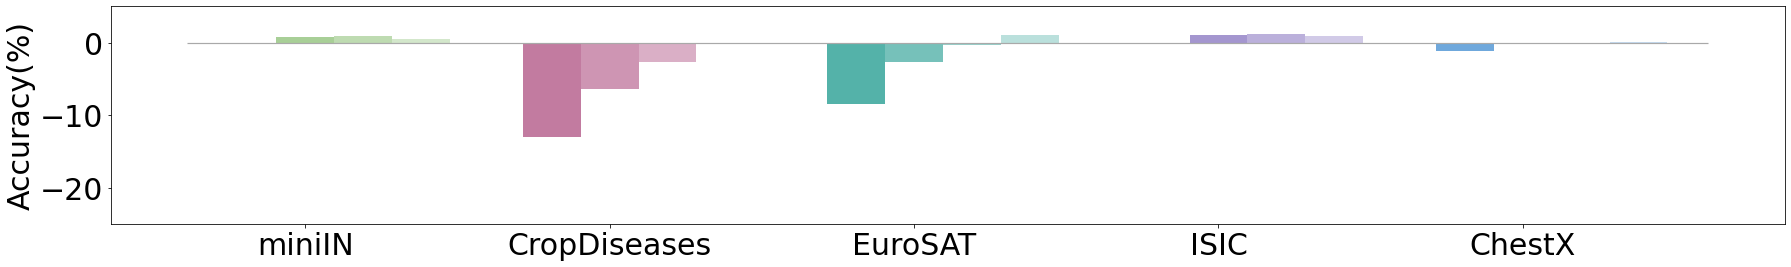

In [134]:
result = pd.DataFrame(None, index=cdfsl, columns=['_0.2', '_0.4', '_0.6', '_0.8'])

path_no_aug = "mini_full.csv"
test_acc_no = pd.read_csv(path_no_aug, index_col = 'Unnamed: 0')

for data in result.index:
    acc_no = test_acc_no.loc[data,'01shot']
    for types in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/augmentation/randomresizedcrop/test_history{}.csv".format(data, types)
        test_acc = pd.read_csv(path, index_col='Unnamed: 0')
        acc = test_acc.mean()[-1] * 100
        result.loc[data][types] = acc - acc_no
    print()
result.columns = ["0.2", "0.4", "0.6", "0.8"]
#plt.figure(figsize=(6,8))

fig, ax = plt.subplots(figsize=(30,4))
bar_width = 0.19
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐

b1 = plt.bar(index, result.loc[:, '0.2'].values.astype('float'), bar_width, alpha=1, color=color_cdfsl, label='k=1')

b2 = plt.bar(index + bar_width, result.loc[:, '0.4'].values.astype('float'), bar_width, alpha=0.8, color=color_cdfsl, label='k=5')

b3 = plt.bar(index + 2*bar_width, result.loc[:, '0.6'].values.astype('float'), bar_width, alpha=0.6, color=color_cdfsl, label='k=20')

b4 = plt.bar(index + 3*bar_width, result.loc[:, '0.8'].values.astype('float'), bar_width, alpha=0.4, color=color_cdfsl, label='k=20')

plt.hlines(y=0, xmin=-0.2, xmax=4.8, color='darkgray', linewidth=1.2) # 0축 
# for idx in range(len(cdfsl)):
#     plt.bar(result.columns, result.loc[cdfsl[idx],:])
plt.xticks(np.arange(bar_width+0, 5 + bar_width, 1), ['miniIN', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX'], size = 30)
plt.yticks(size = 30)
plt.ylim([-25, 5])
plt.ylabel("Accuracy(%)", size = 30)
#plt.legend(cdfsl, loc = (0, 1.05), ncol = 2, fontsize=20)
plt.savefig('./img_pdf/aug_intensity/01shot_diff.pdf', bbox_inches='tight', format='pdf')

In [21]:
test_acc.loc[data,'20shot']

62.3622235506773

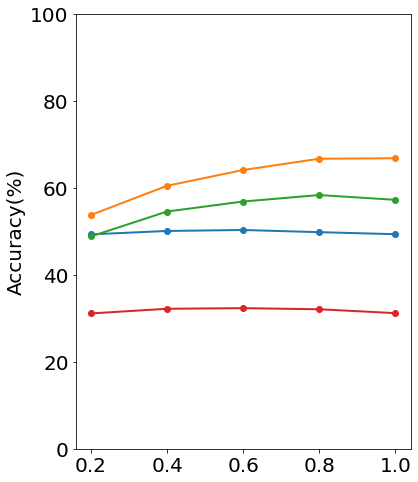

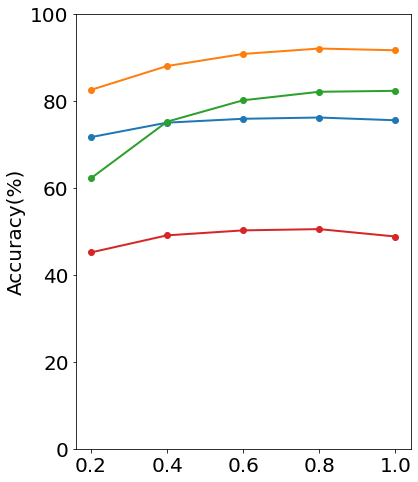

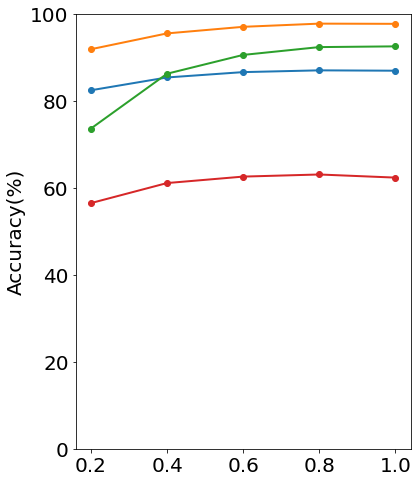

In [82]:
for shot in ['01shot', '05shot', '20shot']:
    result = pd.DataFrame(None, index=cdfsl, columns=['_0.2', '_0.4', '_0.6', '_0.8', '_1.0'])
    for types in result.columns:
        for data in result.index:
            path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/randomresizedcrop/test_history{}.csv".format(data, shot, types)

            if types == '_1.0':
                path = "mini_full.csv"
                test_acc = pd.read_csv(path, index_col = 'Unnamed: 0')
                acc = test_acc.loc[data,shot]
            else:
                test_acc = pd.read_csv(path, index_col='Unnamed: 0')
                acc = test_acc.mean()[-1] * 100
            result.loc[data][types] = acc
        print()
    result.columns = ["0.2", "0.4", "0.6", "0.8", "1.0"]
    plt.figure(figsize=(6,8))

    for idx in range(len(['mini_test','crop', 'euro', 'isic'])):
        plt.plot(result.columns, result.loc[cdfsl[idx],:], 'o-')
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.ylabel("Accuracy(%)", size = 20)
    plt.ylim([0, 100])
    plt.show()
    #plt.legend(cdfsl, loc = (0, 1.05), ncol = 2, fontsize=20)
    #plt.savefig('./img_pdf/aug_intensity/20shot.pdf', bbox_inches='tight', format='pdf')

In [40]:
path_2 = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/base/test_history_tta_1_clean.csv".format(data, types)
test_acc_2 = pd.read_csv(path_2, index_col='Unnamed: 0')
test_acc_2.iloc[:,-1]

1      0.386667
2      0.266667
3      0.346667
4      0.240000
5      0.346667
         ...   
596    0.413333
597    0.280000
598    0.293333
599    0.333333
600    0.373333
Name: epoch100, Length: 600, dtype: float64

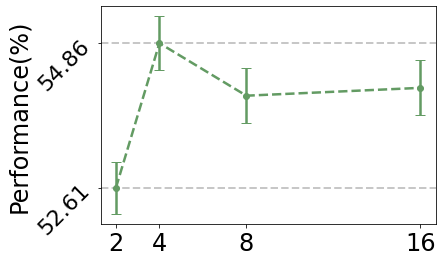

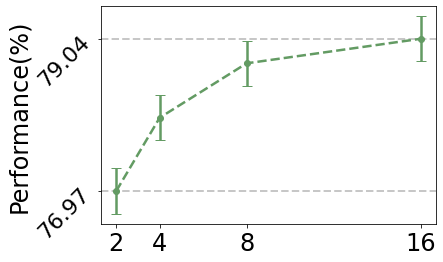

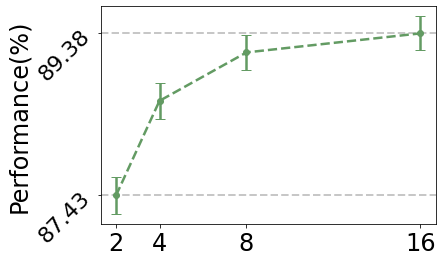

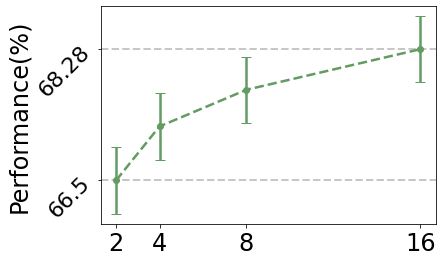

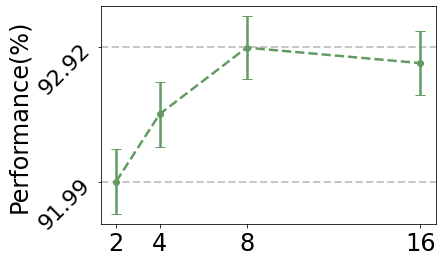

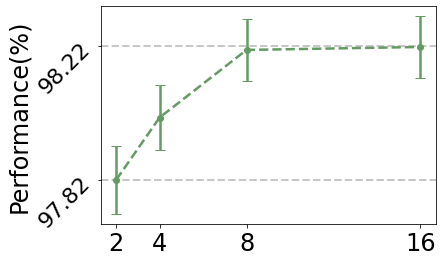

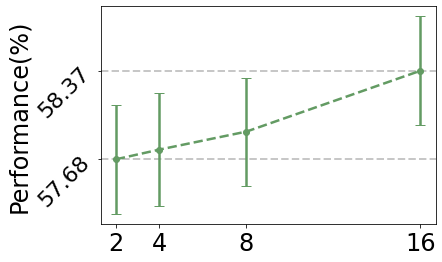

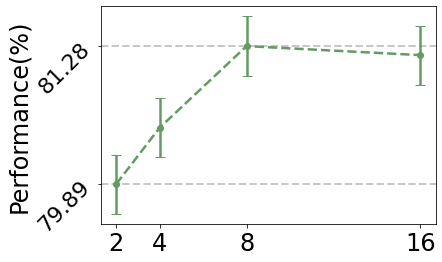

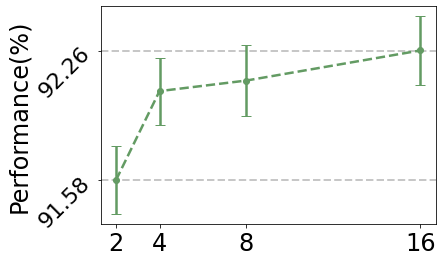

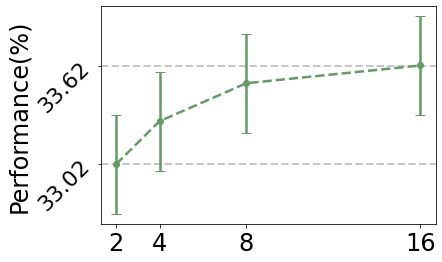

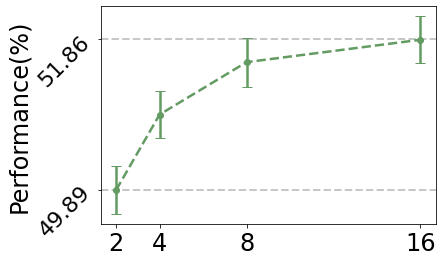

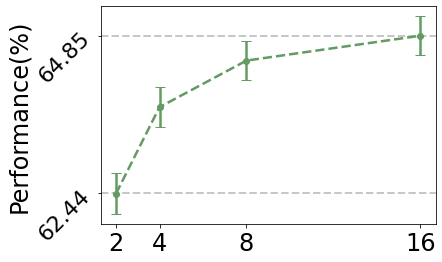

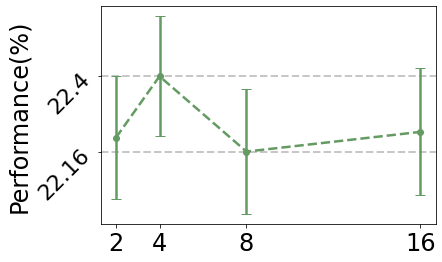

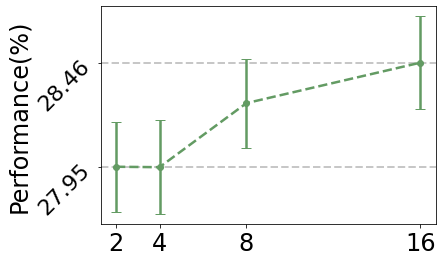

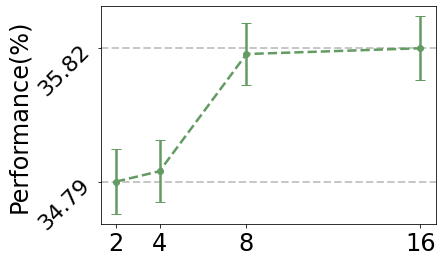

In [73]:
result = pd.DataFrame(None, index=cdfsl, columns=['01shot', '05shot', '20shot'])
for data in result.index:
    for types in result.columns:
        plt.figure(figsize=(6,4))
        # 2
        path_2 = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/base/test_history_tta_1_clean.csv".format(data, types)
        test_acc_2 = pd.read_csv(path_2, index_col='Unnamed: 0')
        acc_2 = test_acc_2.iloc[:,-1]*100
        
        # 4
        path_4 = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/base/test_history_tta_3_clean.csv".format(data, types)
        test_acc_4 = pd.read_csv(path_4, index_col='Unnamed: 0')
        acc_4 = test_acc_4.iloc[:,-1]*100
        
        # 8
        path_8 = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/base/test_history_tta_7_clean.csv".format(data, types)
        test_acc_8 = pd.read_csv(path_8, index_col='Unnamed: 0')
        acc_8 = test_acc_8.iloc[:,-1]*100
        
        # 16
        path_16 = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/augmentation/base/test_history_tta_15_clean.csv".format(data, types)
        test_acc_16 = pd.read_csv(path_16, index_col='Unnamed: 0')
        acc_16 = test_acc_16.iloc[:,-1]*100
        
        acc_result = pd.concat([acc_2, acc_4, acc_8, acc_16], axis=1)
        acc_result.columns = [2, 4, 8, 16]
        
        plt.errorbar(acc_result.columns, acc_result.mean(axis=0), acc_result.std(axis=0)/np.sqrt(600), \
                     fmt="o--", capsize=5, linewidth=2.5, markersize=6, color='#639b63')
        plt.ylabel("Performance(%)", size=24)
        plt.xticks(acc_result.columns, size=24)
        vmin = np.round(np.min(acc_result.mean(axis=0)),2)
        vmax = np.round(np.max(acc_result.mean(axis=0)),2)
        plt.yticks([vmin, vmax], [vmin, vmax], fontsize=22, rotation=45)
        plt.grid(ls='--', axis='y', linewidth=2, alpha=0.7)
        plt.savefig('./img_pdf/tta/{}_{}.pdf'.format(types, data), bbox_inches='tight', format='pdf')
        plt.show()


In [13]:
acc_result.std(axis=0)/np.sqrt(600)

2     0.248635
4     0.237889
8     0.235143
16    0.246422
dtype: float64

In [71]:
acc_result.std(axis=0)

1+1     6.090296
3+1     5.827060
7+1     5.759799
15+1    6.036079
dtype: float64